## May report TIC


# Import libraries


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading data

In [44]:
df = pd.read_csv("data.csv", sep=";")

df = df.rename(columns={'Дата': 'Date', 'Гости': 'Guests', 'Количество': 'Amount', 'Город': 'City',
                        'Цель_визита_1': 'Purpose_of_visit_1', 'Цель_визита_2': 'Purpose_of_visit_2',
                        'Полиграфия': 'Polygraphy', 'Комментарии': 'Comments'})
df['City'] = df['City'].fillna("Тверь")
df['City'] = df['City'].replace(' ', "Тверь")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                537 non-null    object 
 1   Guests              537 non-null    object 
 2   Amount              533 non-null    float64
 3   City                537 non-null    object 
 4   Purpose_of_visit_1  501 non-null    object 
 5   Purpose_of_visit_2  94 non-null     object 
 6   Polygraphy          46 non-null     object 
 7   Comments            20 non-null     object 
dtypes: float64(1), object(7)
memory usage: 33.7+ KB


In [46]:
df.head()

,Date,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
0,01.05.2024,Семья с детьми,3.0,Москва,Маршрут прогулки,Печатные карты,NaN,NaN
1,01.05.2024,Старше 35 лет,1.0,москва,Маршрут прогулки,Печатные карты,NaN,NaN
2,01.05.2024,Группа,2.0,Тверь,Сувениры,Просто посмотреть,NaN,NaN
3,01.05.2024,Группа,3.0,Тверь,Сувениры,NaN,NaN,NaN
4,01.05.2024,Семья с детьми,4.0,Тверь,Просто посмотреть,NaN,NaN,NaN


In [47]:
df.tail()

,Date,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
532,31.05.2024,Старше 35 лет,1.0,Тверь,Просто посмотреть,NaN,NaN,NaN
533,31.05.2024,Семья с детьми,2.0,Тверь,Печатные карты,NaN,NaN,NaN
534,31.05.2024,Семья с детьми,2.0,Тверь,Просто посмотреть,NaN,NaN,NaN
535,31.05.2024,Семья с детьми,2.0,Тверь,Просто посмотреть,NaN,NaN,NaN
536,31.05.2024,Старше 35 лет,1.0,Тверь,Экскурсии,NaN,NaN,автобуснык экскурсии


# Data cleaning

Adding column for weekday

In [48]:
# """ Now I want to add column for weekdays. In process, I realised that I need to change the date format 
#     for my own comfort. I managed those things like this """
df.Date = df.Date.str.split(".").str[::-1].str.join("-")

weekday = pd.to_datetime(df.Date).dt.day_name()
df.insert(1, 'Weekday', weekday)
df.head()

,Date,Weekday,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
0,2024-05-01,Wednesday,Семья с детьми,3.0,Москва,Маршрут прогулки,Печатные карты,NaN,NaN
1,2024-05-01,Wednesday,Старше 35 лет,1.0,москва,Маршрут прогулки,Печатные карты,NaN,NaN
2,2024-05-01,Wednesday,Группа,2.0,Тверь,Сувениры,Просто посмотреть,NaN,NaN
3,2024-05-01,Wednesday,Группа,3.0,Тверь,Сувениры,NaN,NaN,NaN
4,2024-05-01,Wednesday,Семья с детьми,4.0,Тверь,Просто посмотреть,NaN,NaN,NaN


Amount of empty dates

In [49]:
df['Date'].unique()

# 05-12 is missing. Let's add empty row
df.index[df['Date'] == "2024-05-13"][0]  # 251
df.iloc[251]  # Monday, so 05-12 is Sunday

df.loc[251] = ["2024-05-12", pd.to_datetime("2024-05-12").day_name(), np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan]
df.index = df.index + 1
df = df.sort_index()

df.head()


,Date,Weekday,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
1,2024-05-01,Wednesday,Семья с детьми,3.0,Москва,Маршрут прогулки,Печатные карты,NaN,NaN
2,2024-05-01,Wednesday,Старше 35 лет,1.0,москва,Маршрут прогулки,Печатные карты,NaN,NaN
3,2024-05-01,Wednesday,Группа,2.0,Тверь,Сувениры,Просто посмотреть,NaN,NaN
4,2024-05-01,Wednesday,Группа,3.0,Тверь,Сувениры,NaN,NaN,NaN
5,2024-05-01,Wednesday,Семья с детьми,4.0,Тверь,Просто посмотреть,NaN,NaN,NaN


In [50]:
df[248:253]

,Date,Weekday,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
249,2024-05-11,Saturday,Группа,2.0,Тверь,NaN,NaN,NaN,NaN
250,2024-05-11,Saturday,Семья с детьми,3.0,Тверь,NaN,NaN,NaN,NaN
251,2024-05-11,Saturday,Группа,2.0,Тверь,NaN,NaN,NaN,NaN
252,2024-05-12,Sunday,NaN,0.0,NaN,NaN,NaN,NaN,NaN
253,2024-05-13,Monday,Группа,2.0,Тверь,Просто посмотреть,NaN,Нет,NaN


In [51]:
df['Date'].unique()

array(['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04',
       '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
       '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12',
       '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16',
       '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20',
       '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
       '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
       '2024-05-29', '2024-05-30', '2024-05-31'], dtype=object)

Let's look at our cities and fix them

In [52]:
df.City = df.City.str.lstrip().str.rstrip().str.title()
df.City = df.City.fillna('Тверь')
df.City.unique()

array(['Москва', 'Тверь', 'Клин', 'Санкт-Петербург', 'Смоленск',
       'Петербург', 'Зелеоград', 'Моск.Обл.', 'Мо', 'Рязань',
       'Московская Область', 'Московская Обл', 'Москоская Область',
       'Вышний Волочек', 'Тула', 'Калининград', 'Питер', 'Белгород',
       'Оренбург', 'Волгоград', 'Мурманс', 'Казань', 'Брянск',
       'Подмосковье'], dtype=object)

In [53]:
df = df.replace(["Питер", "Петербург"], "Санкт-Петербург")
df = df.replace(["Москвы", "Моква"], "Москва")
df = df.replace(["Моск.Обл.", "Московская Обл", "Москоская Область", "Мо", "Подмосковье"], "Московская Область")
df = df.replace("Зелеоград", "Зеленоград")
df = df.replace("Мурманс", "Мурманск")
df.City.unique()

array(['Москва', 'Тверь', 'Клин', 'Санкт-Петербург', 'Смоленск',
       'Зеленоград', 'Московская Область', 'Рязань', 'Вышний Волочек',
       'Тула', 'Калининград', 'Белгород', 'Оренбург', 'Волгоград',
       'Мурманск', 'Казань', 'Брянск'], dtype=object)

Change 'Amount' column type to int. Fill empty cells

In [54]:
# Will work with empty cells, but I am going to fix them
# df['Amount'] = df['Amount'].fillna(0.0).astype(int)

df.index[df['Amount'].isna()]  # Index([348, 416, 481, 491], dtype='int64')

df.loc[348, 'Amount'] = 1
df.loc[416, 'Amount'] = 1
df.loc[481, 'Amount'] = 3
df.loc[491, 'Amount'] = 3

df['Amount'] = df['Amount'].astype("int8")
df.head()

,Date,Weekday,Guests,Amount,City,Purpose_of_visit_1,Purpose_of_visit_2,Polygraphy,Comments
1,2024-05-01,Wednesday,Семья с детьми,3,Москва,Маршрут прогулки,Печатные карты,NaN,NaN
2,2024-05-01,Wednesday,Старше 35 лет,1,Москва,Маршрут прогулки,Печатные карты,NaN,NaN
3,2024-05-01,Wednesday,Группа,2,Тверь,Сувениры,Просто посмотреть,NaN,NaN
4,2024-05-01,Wednesday,Группа,3,Тверь,Сувениры,NaN,NaN,NaN
5,2024-05-01,Wednesday,Семья с детьми,4,Тверь,Просто посмотреть,NaN,NaN,NaN


# Adding plot functions

Groupby + Amount

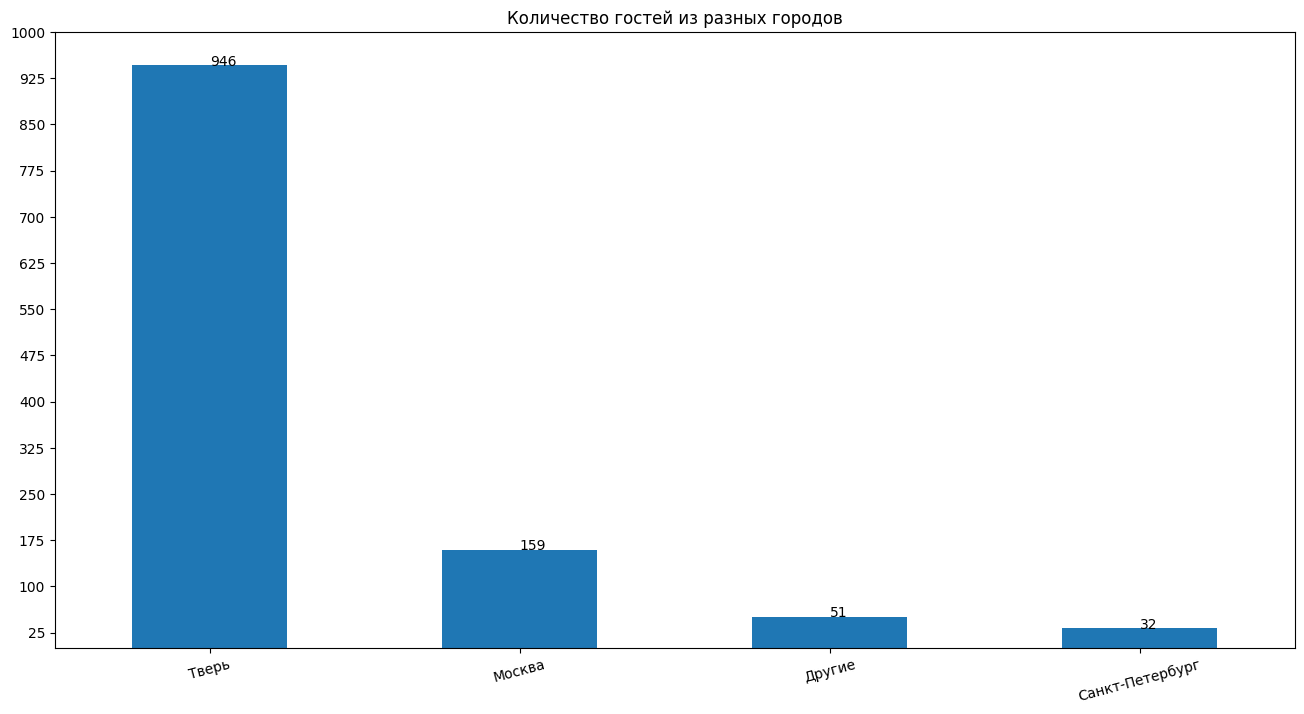

In [55]:
def plot_groupby_amount(on: str, top: int, title: str =None, xlabel: str =None, ylabel: str =None):
    """
    Takes a column name to groupby on ('Sex', 'Date' etc) and creates bar plot with top 'Amount' values.

    Args:
        on (str): Column name in DataFrame to groupby on, e.g. 'Date', 'Purpose', 'Order'.
        top (int): Top N+1 values to be shown in the plot (N actual bars and 1 'Other' bar), e.g. 3, 5, 12.
    """

    # Check if given column name is present in DataFrame
    if on not in df.columns:
        print(f"ParameterError (on), '{on}' not in df.columns!")
        return
    
    # Group DataFrame on given column and count all visitors
    df_groupby = df.groupby(on)['Amount'].sum()
    
    # DataFrame for plotting
    df_plot = df_groupby.copy()
    df_plot = df_plot.sort_values(ascending=False)
    # Calculate 'Other' bar
    df_plot['Другие'] = df_plot.sum() - df_plot[:top].sum()
    df_plot = df_plot.sort_values(ascending=False)[:top+1]

    # Plotting 
    figure = plt.figure(figsize=(16, 8))  
    plt.title(title)
    df_plot.plot(kind='bar')
    plt.xticks(rotation=15)
    plt.xlabel(xlabel)

    top_value = round(max(df_plot) + 10, -2)
    step = -10 if top_value <= 100 else -25*(len(str(top_value))-1)
    plt.yticks(range(top_value, -1, step))
    plt.ylabel(ylabel)

    y_axis = df_plot.axes[0].to_list()
    for i in range(len(y_axis)):
        plt.annotate(df_plot.iloc[i], (i, df_plot.iloc[i]))

    plt.show()
    plt.close()


plot_groupby_amount(on='City', top=3, title="Количество гостей из разных городов")

In [56]:
round(1945 + 10, -1)

1960

# Data analysis

Count all guests

In [57]:
totalGuests = df['Amount'].sum()
totalGuests

1188

How many visitors from each city

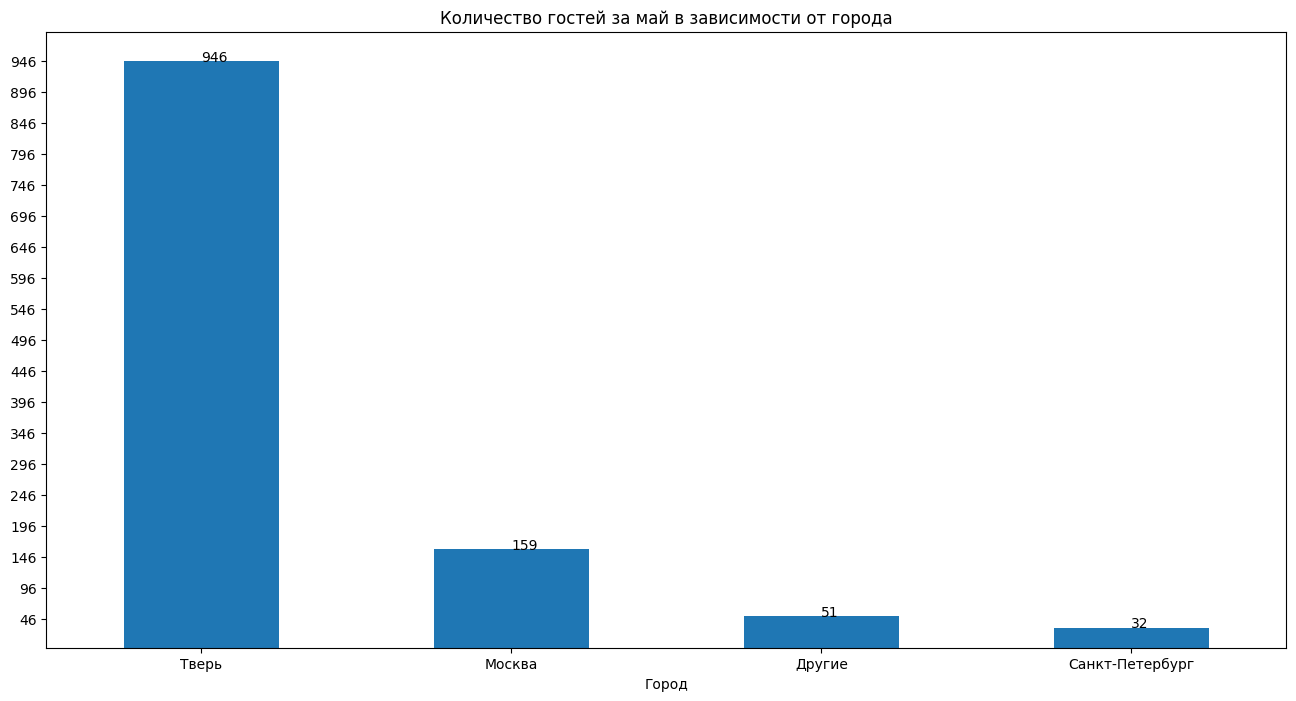

In [58]:
totalCities = df.groupby('City')['Amount'].sum()
totalCities

plotCities = totalCities.copy()
plotCities = plotCities.sort_values(ascending=False)
plotCities['Другие'] = plotCities.sum() - sum(plotCities[:3])
plotCities = plotCities.sort_values(ascending=False)[:4]

plt.figure(figsize=(16, 8))  
plt.title('Количество гостей за май в зависимости от города')
plotCities.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Город")
plt.yticks(range(max(plotCities), -1, -50))
cities = plotCities.axes[0].to_list()
for i in range(len(cities)):
    plt.annotate(plotCities.iloc[i], (i, plotCities.iloc[i]))
plt.show()
plt.close()

Let's plot data about our daily visitors

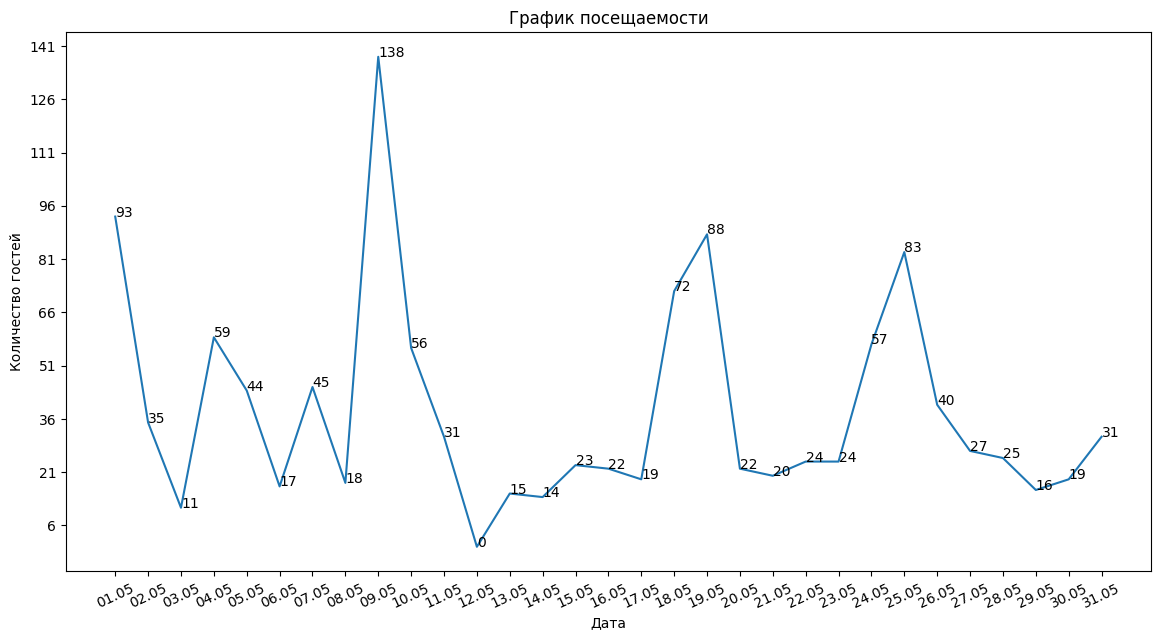

In [59]:
group_by_date = df.groupby('Date')['Amount'].sum()
group_by_date

plot_visitors = group_by_date

dates = []
for x in range(1, 31 + 1):
    if x < 10:
        dates.append(f'0{x}.05')
    else:
        dates.append(f'{x}.05')

plt.figure(figsize=(14, 7))
plt.plot(dates, plot_visitors)
plt.title('График посещаемости')
plt.xlabel('Дата')
plt.ylabel('Количество гостей')
plt.xticks(rotation=25)
plt.yticks(range(max(plot_visitors) + 3, -1, -15))
for i in range(len(dates)):
    plt.annotate(plot_visitors.iloc[i], (i, plot_visitors.iloc[i]))
plt.show()

## Importing data for prediction

In [60]:
day_visits = df.groupby('Date').sum()[['Amount']]
may_predict = df.groupby('Date').first()[['Weekday']]
may_predict['Amount'] = day_visits

In [61]:
may_predict.head()

,Weekday,Amount
Date,,
2024-05-01,Wednesday,93
2024-05-02,Thursday,35
2024-05-03,Friday,11
2024-05-04,Saturday,59
2024-05-05,Sunday,44


In [62]:
may_predict.to_csv(path_or_buf=r"C:\Users\1\DataAnalyticsProjects\ТИЦ\Prediction\prediction.csv", mode="a")